In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [136]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\Data Science\kc_house_data.csv")

In [137]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: xlabel='bedrooms', ylabel='Count'>

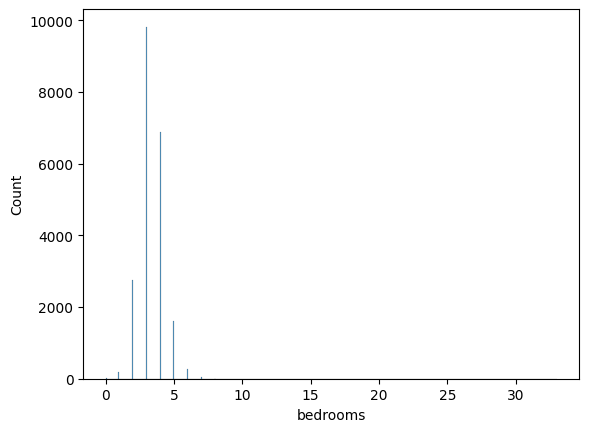

In [139]:
sns.histplot(df['bedrooms'])

In [140]:
df[df['grade'] > 14]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [141]:
df.drop(15870, axis = 0, inplace = True)

<Axes: xlabel='bedrooms', ylabel='Count'>

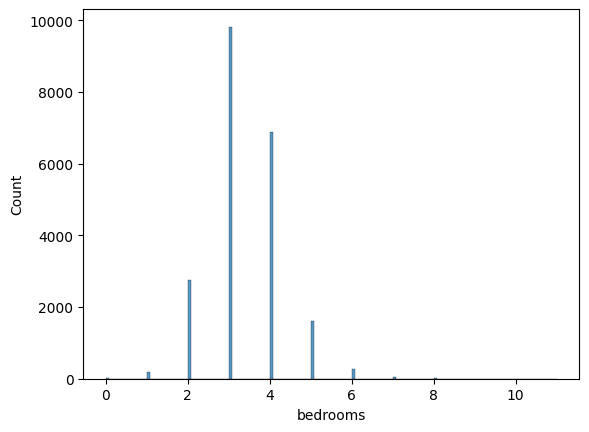

In [142]:
sns.histplot(df['bedrooms'])

In [143]:
avg_sqftprice = df.groupby('zipcode').apply(lambda x: x['price'].mean()/x['sqft_living'].mean()).reset_index()
avg_sqftprice.columns = ['zipcode', 'avg_sqftprice']
df = pd.merge(df, avg_sqftprice, on='zipcode')

In [144]:
#house_age = 2015 - df['yr_built']
#df = pd.merge(df, house_age)

In [145]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,avg_sqftprice
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,179.612311
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,880,0,1945,0,98178,47.5009,-122.248,1190,6780,179.612311
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,179.612311
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,179.612311
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,860,0,1931,0,98178,47.5048,-122.272,1650,8775,179.612311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,0,...,3990,0,1989,0,98039,47.6177,-122.229,3450,16087,568.446052
21608,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,4065,0,1987,0,98039,47.6209,-122.237,3070,18713,568.446052
21609,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,0,...,3410,0,2006,0,98039,47.6295,-122.236,3410,16236,568.446052
21610,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,...,5190,0,2013,0,98039,47.6102,-122.225,3840,19250,568.446052


In [166]:
results = ols("price ~ avg_sqftprice + sqft_living + waterfront + grade", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:05:02   Log-Likelihood:            -2.9178e+05
No. Observations:               21612   AIC:                         5.836e+05
Df Residuals:                   21607   BIC:                         5.836e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.343e+05   9559.269    -87.273

In [147]:
pred_vals = results.predict(df[['price_zip_avg','price_sqft_avg', 'view']])

KeyError: "['price_zip_avg', 'price_sqft_avg'] not in index"

In [ ]:
pred_vals

0        2.244908e+05
1        2.244908e+05
2        2.244908e+05
3        2.244908e+05
4        2.244908e+05
             ...     
21608    4.348904e+06
21609    5.571238e+06
21610    6.960508e+06
21611    3.148370e+06
21612    2.752863e+06
Length: 21613, dtype: float64

In [ ]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [ ]:
res['error'] = res['y_hat'] - res['price']

In [ ]:
res.head()

,y_hat,price,error
0,224490.807082,221900.0,2590.807082
1,224490.807082,260000.0,-35509.192918
2,224490.807082,160000.0,64490.807082
3,224490.807082,289900.0,-65409.192918
4,224490.807082,194000.0,30490.807082


In [ ]:
res['sq_error'] = res['error']**2

In [ ]:
np.sqrt(res['sq_error'].mean())

162308.99347367376

(array([3.0000e+00, 1.7000e+01, 3.6000e+01, 9.0000e+01, 5.6800e+02,
        1.5601e+04, 5.1770e+03, 1.0700e+02, 1.3000e+01, 1.0000e+00]),
 array([-2134613.21940982, -1766311.68458108, -1398010.14975235,
        -1029708.61492361,  -661407.08009487,  -293105.54526613,
           75195.98956261,   443497.52439134,   811799.05922008,
         1180100.59404882,  1548402.12887756]),
 <BarContainer object of 10 artists>)

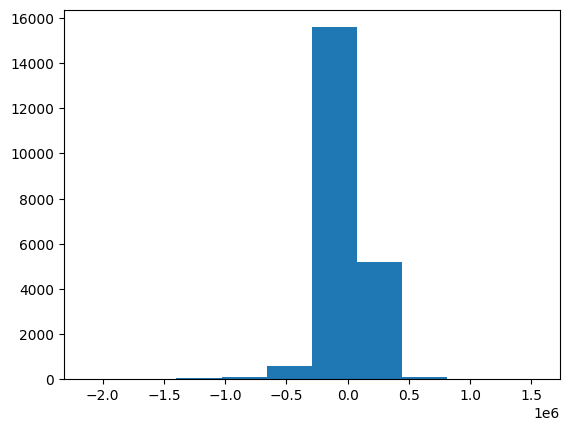

In [ ]:
plt.hist(res['error'])